## Import Statement

In [26]:
from pyspark.sql import SQLContext
from handyspark import *
from pyspark.sql import functions as sf
from matplotlib import pyplot as plt
from pyspark.sql.functions import col, avg
import pandas as pd
import pyspark
from datetime import datetime, timedelta, date
from pyspark.sql.functions import broadcast
from pyspark.sql.types import DateType
from pyspark.sql.functions import col, avg, date_format,month,hour,lag, date_sub,lit

In [27]:
log4jLogger = sc._jvm.org.apache.log4j
LOGGER = log4jLogger.LogManager.getLogger(__name__)
LOGGER.error("pyspark script logger initialized")

In [28]:
sc.stop()
sc = pyspark.SparkContext(master="spark://172.16.27.115:7077",appName="spark")
sc

<SparkContext master=spark://172.16.27.115:7077 appName=spark>

In [29]:
base_path = "/media/iitp/disk/smart-meters-in-london/"
sqlcontext = SQLContext(sc)

In [30]:
#sqlcontext
household_info = sqlcontext.read.csv(base_path+"informations_households.csv",header=True,inferSchema=True)
#household_mini = sc.parallelize(household_info.take(1)).toDF()
household_mini = household_info

In [31]:
household_mini.printSchema()

root
 |-- LCLid: string (nullable = true)
 |-- stdorToU: string (nullable = true)
 |-- Acorn: string (nullable = true)
 |-- Acorn_grouped: string (nullable = true)
 |-- file: string (nullable = true)



In [32]:
column_list = []
for i in range(48):
    column_list.append("hh_"+str(i))
column_list
new_column_list = []
for i in range(1,49):
    if i<20:
        new_column_list.append("0"+str(i*0.5))
    else:
        new_column_list.append(str(i*0.5))

In [33]:
flag = 0
df_full = []
df_file = household_mini.select("file").distinct()
# exprs = {x: "avg" for x in new_column_list}
exprs1 = [avg(x) for x in column_list[0:40]]
exprs2 = [avg(x) for x in column_list[40:48]]        #due to the fact large number of column giving error so divide
count = 0
for row in df_file.rdd.collect():
    file = row.file
    print(file,count)
    count += 1
    file_path = base_path + "hhblock_dataset/"+ file+".csv"
    half_hourly_consumption_data = sqlcontext.read.csv(file_path,header=True,inferSchema=True).cache()
    half_hourly_consumption_data.dropna(how='any')
    #half_hourly_consumption_data2 = half_hourly_consumption_data.groupBy('LCLid').agg(*exprs2)
    #half_hourly_consumption_data = half_hourly_consumption_data.groupBy('LCLid').agg(*exprs1)
    #half_hourly_consumption_data = half_hourly_consumption_data.join(half_hourly_consumption_data2,["LCLid"])
    #half_hourly_consumption_data.dropna(how='any')
    #half_hourly_consumption_data.printSchema()
    if flag == 0:
        df_full = sqlcontext.createDataFrame([],half_hourly_consumption_data.schema)
        flag = 1
    df_full = df_full.union(half_hourly_consumption_data)
    df_full = df_full.cache()

block_64 0
block_91 1
block_39 2
block_43 3
block_77 4
block_19 5
block_35 6
block_53 7
block_26 8
block_20 9
block_52 10
block_12 11
block_21 12
block_36 13
block_89 14
block_84 15
block_49 16
block_93 17
block_99 18
block_18 19
block_44 20
block_8 21
block_71 22
block_104 23
block_4 24
block_29 25
block_38 26
block_47 27
block_48 28
block_42 29
block_85 30
block_27 31
block_108 32
block_76 33
block_1 34
block_3 35
block_56 36
block_94 37
block_72 38
block_75 39
block_78 40
block_62 41
block_101 42
block_46 43
block_110 44
block_32 45
block_51 46
block_45 47
block_59 48
block_40 49
block_15 50
block_95 51
block_96 52
block_5 53
block_68 54
block_28 55
block_97 56
block_82 57
block_69 58
block_70 59
block_61 60
block_24 61
block_33 62
block_23 63
block_31 64
block_67 65
block_0 66
block_14 67
block_41 68
block_100 69
block_22 70
block_109 71
block_83 72
block_30 73
block_88 74
block_98 75
block_106 76
block_37 77
block_10 78
block_80 79
block_103 80
block_55 81
block_73 82
block_111 83

In [34]:
#avg_house_data.take(1)
df_full.printSchema()

root
 |-- LCLid: string (nullable = true)
 |-- day: timestamp (nullable = true)
 |-- hh_0: double (nullable = true)
 |-- hh_1: double (nullable = true)
 |-- hh_2: double (nullable = true)
 |-- hh_3: double (nullable = true)
 |-- hh_4: double (nullable = true)
 |-- hh_5: double (nullable = true)
 |-- hh_6: double (nullable = true)
 |-- hh_7: double (nullable = true)
 |-- hh_8: double (nullable = true)
 |-- hh_9: double (nullable = true)
 |-- hh_10: double (nullable = true)
 |-- hh_11: double (nullable = true)
 |-- hh_12: double (nullable = true)
 |-- hh_13: double (nullable = true)
 |-- hh_14: double (nullable = true)
 |-- hh_15: double (nullable = true)
 |-- hh_16: double (nullable = true)
 |-- hh_17: double (nullable = true)
 |-- hh_18: double (nullable = true)
 |-- hh_19: double (nullable = true)
 |-- hh_20: double (nullable = true)
 |-- hh_21: double (nullable = true)
 |-- hh_22: double (nullable = true)
 |-- hh_23: double (nullable = true)
 |-- hh_24: double (nullable = true)
 |-- 

## filtering data as per requirement
Total user in 2013  5528

Total user in 2013 with full evidence  3961


In [35]:
df_full = df_full.withColumn("day",df_full["day"].cast(DateType()))
df_full.printSchema()

root
 |-- LCLid: string (nullable = true)
 |-- day: date (nullable = true)
 |-- hh_0: double (nullable = true)
 |-- hh_1: double (nullable = true)
 |-- hh_2: double (nullable = true)
 |-- hh_3: double (nullable = true)
 |-- hh_4: double (nullable = true)
 |-- hh_5: double (nullable = true)
 |-- hh_6: double (nullable = true)
 |-- hh_7: double (nullable = true)
 |-- hh_8: double (nullable = true)
 |-- hh_9: double (nullable = true)
 |-- hh_10: double (nullable = true)
 |-- hh_11: double (nullable = true)
 |-- hh_12: double (nullable = true)
 |-- hh_13: double (nullable = true)
 |-- hh_14: double (nullable = true)
 |-- hh_15: double (nullable = true)
 |-- hh_16: double (nullable = true)
 |-- hh_17: double (nullable = true)
 |-- hh_18: double (nullable = true)
 |-- hh_19: double (nullable = true)
 |-- hh_20: double (nullable = true)
 |-- hh_21: double (nullable = true)
 |-- hh_22: double (nullable = true)
 |-- hh_23: double (nullable = true)
 |-- hh_24: double (nullable = true)
 |-- hh_25

In [36]:
#df_full = df_full.withColum("date",date_format(df_full["date"],"yyyy-MM-dd").cast(Datetype()))
df_full = df_full.filter((df_full.day >= date(2013,1,1)) & (df_full.day <= date(2013,12,31)))
df_full = df_full.na.drop()
print ("Total user in 2013 ", df_full.select("LCLid").distinct().count())
year_df = df_full.groupBy("LCLid").count()
year_df = year_df.filter(year_df["count"] >= 365 )
print("Total user in 2013 with full evidence ", year_df.select("LCLid").distinct().count())

Total user in 2013  5528
Total user in 2013 with full evidence  1132


In [ ]:
year_df = df_full.groupBy("LCLid").count()
year_df.show()
year_df = year_df.filter(year_df["count"] >= 365 )

In [37]:
half_hourly_consumption_df = df_full.join(broadcast(year_df),["LCLid"])
half_hourly_consumption_df.take(1)

[Row(LCLid='MAC000682', day=datetime.date(2013, 1, 1), hh_0=0.10099999999999999, hh_1=0.161, hh_2=0.196, hh_3=0.125, hh_4=0.094, hh_5=0.075, hh_6=0.11, hh_7=0.073, hh_8=0.10800000000000001, hh_9=0.064, hh_10=0.09699999999999999, hh_11=0.08, hh_12=0.08199999999999999, hh_13=0.099, hh_14=0.061, hh_15=0.065, hh_16=0.265, hh_17=0.09699999999999999, hh_18=0.158, hh_19=0.124, hh_20=0.115, hh_21=0.179, hh_22=1.025, hh_23=0.45399999999999996, hh_24=1.216, hh_25=1.13, hh_26=1.14, hh_27=1.205, hh_28=0.96, hh_29=0.927, hh_30=0.794, hh_31=0.198, hh_32=0.069, hh_33=0.133, hh_34=0.11199999999999999, hh_35=0.122, hh_36=0.096, hh_37=0.077, hh_38=0.153, hh_39=0.20800000000000002, hh_40=0.12, hh_41=0.172, hh_42=0.16399999999999998, hh_43=0.307, hh_44=0.139, hh_45=0.107, hh_46=0.14400000000000002, hh_47=0.172, count=365)]

In [ ]:
#flag = 0
#avg_house_data = []
#block_read = set([])
#for row in household_mini.rdd.collect():
#    house_id = row.LCLid
#    file = row.file
#    print(house_id,file)
#    file_path = base_path + "hhblock_dataset/"+ file+".csv"
#    if file not in block_read:
##         print("hi")
#        block_read.add(file)
#        half_hourly_consumption_data = sqlcontext.read.csv(file_path,header=True,inferSchema=True)
#        half_hourly_consumption_data.dropna(how='any')
#        for c,n in zip(column_list,new_column_list):
#            half_hourly_consumption_data=half_hourly_consumption_data.withColumnRenamed(c,n)
#    indiv_house_data = half_hourly_consumption_data.where(col("LCLid") == house_id)
#    indiv_house_data = indiv_house_data.toHandy()
#    if indiv_house_data.rdd.isEmpty():
#        print("Missing Id = {} in file = {}".format(house_id,file))
#        continue
#    indiv_house_data = sqlcontext.createDataFrame(indiv_house_data.stratify(['LCLid']).cols[new_column_list].mean().reset_index())
#     indiv_house_data.printSchema()
#    if flag == 0:
#        avg_house_data = sqlcontext.createDataFrame([],indiv_house_data.schema)
#        flag = 1
#    avg_house_data = avg_house_data.union(indiv_house_data)

MAC005492 block_0
MAC001074 block_0
MAC000002 block_0
MAC003613 block_0
MAC003597 block_0
MAC003579 block_0
MAC003566 block_0
MAC003557 block_0
MAC003553 block_0
MAC003482 block_0
MAC003463 block_0
MAC003449 block_0
MAC003428 block_0
MAC003423 block_0
MAC003422 block_0
MAC003400 block_0
MAC003394 block_0
MAC003388 block_0
MAC003348 block_0
MAC000246 block_0
MAC003305 block_0
MAC003281 block_0
MAC003252 block_0
MAC003239 block_0
MAC003646 block_0
MAC003656 block_0
MAC003668 block_0
MAC003680 block_0
MAC004431 block_0
MAC004387 block_0
MAC004319 block_0
MAC004247 block_0
MAC004179 block_0
MAC004034 block_0
MAC003874 block_0
MAC003863 block_0
MAC003856 block_0
MAC003851 block_0
MAC003223 block_0
MAC003844 block_0
MAC003826 block_0
MAC003817 block_0
MAC003805 block_0
MAC003775 block_0
MAC003740 block_0
MAC003737 block_0
MAC003719 block_0
MAC003718 block_0
MAC003686 block_0
MAC000450 block_0
MAC003840 block_1
MAC003212 block_1
MAC003182 block_1
MAC003166 block_1
MAC001628 block_1
MAC001533 

MAC003229 block_9
MAC004916 block_9
MAC004915 block_9
MAC004911 block_9
MAC004987 block_9
MAC002148 block_9
MAC004924 block_9
MAC000883 block_9
MAC000105 block_9
MAC002247 block_9
MAC004718 block_9
MAC003093 block_9
MAC004704 block_9
MAC005380 block_9
MAC002358 block_9
MAC000815 block_9
MAC004686 block_9
MAC001873 block_9
MAC001928 block_9
MAC000808 block_9
MAC000052 block_9
MAC004677 block_9
MAC001638 block_9
MAC004666 block_9
MAC000377 block_9
MAC001070 block_9
MAC000109 block_9
MAC004653 block_9
MAC004590 block_9
MAC004360 block_9
MAC004448 block_9
MAC004439 block_9
MAC005015 block_9
MAC005504 block_9
MAC000871 block_9
MAC004318 block_9
MAC002555 block_9
MAC000866 block_9
MAC005517 block_9
MAC000863 block_9
MAC003100 block_9
MAC003364 block_9
MAC002380 block_9
MAC004760 block_9
MAC000026 block_9
MAC002005 block_9
MAC001613 block_9
MAC002375 block_10
MAC004399 block_10
MAC004740 block_10
MAC003708 block_10
MAC002153 block_10
MAC004959 block_10
MAC002928 block_10
MAC001352 block_10
MA

MAC002047 block_17
MAC000910 block_17
MAC002042 block_17
MAC000935 block_17
MAC000939 block_17
MAC000942 block_17
MAC000945 block_17
MAC002027 block_17
MAC002026 block_17
MAC000324 block_17
MAC000982 block_17
MAC002019 block_17
MAC002018 block_17
MAC002016 block_18
MAC000325 block_18
MAC002008 block_18
MAC000500 block_18
MAC002207 block_18
MAC000497 block_18
MAC002210 block_18
MAC005455 block_18
MAC005457 block_18
MAC005459 block_18
MAC005462 block_18
MAC005469 block_18
MAC005479 block_18
MAC002407 block_18
MAC005491 block_18
MAC005496 block_18
MAC002399 block_18
MAC005497 block_18
MAC002394 block_18
MAC005454 block_18
MAC005502 block_18
MAC005505 block_18
MAC005521 block_18
MAC005526 block_18
MAC005531 block_18
MAC005532 block_18
MAC002381 block_18
MAC005539 block_18
MAC002378 block_18
MAC002374 block_18
MAC005268 block_18
MAC005552 block_18
MAC002370 block_18
MAC002390 block_18
MAC005447 block_18
MAC005446 block_18
MAC002434 block_18
MAC005417 block_18
MAC002499 block_18
MAC002498 bl

MAC002941 block_26
MAC002939 block_26
MAC005109 block_26
MAC005156 block_26
MAC003010 block_26
MAC003014 block_26
MAC005038 block_26
MAC005040 block_26
MAC003083 block_26
MAC005041 block_26
MAC005044 block_26
MAC005047 block_26
MAC003075 block_26
MAC003073 block_26
MAC003071 block_26
MAC005055 block_26
MAC003067 block_26
MAC003066 block_26
MAC000284 block_26
MAC005063 block_26
MAC003058 block_26
MAC003056 block_26
MAC003054 block_26
MAC005065 block_26
MAC003052 block_26
MAC003046 block_26
MAC003039 block_26
MAC005075 block_26
MAC005086 block_26
MAC005088 block_26
MAC005094 block_26
MAC005097 block_27
MAC005098 block_27
MAC003017 block_27
MAC003016 block_27
MAC003011 block_27
MAC005037 block_27
MAC005165 block_27
MAC002920 block_27
MAC005225 block_27
MAC002841 block_27
MAC005226 block_27
MAC005227 block_27
MAC002835 block_27
MAC002831 block_27
MAC000296 block_27
MAC005231 block_27
MAC005232 block_27
MAC005233 block_27
MAC005234 block_27
MAC005235 block_27
MAC005238 block_27
MAC002817 bl

MAC001123 block_35
MAC004152 block_35
MAC004144 block_35
MAC000916 block_35
MAC000057 block_35
MAC001117 block_35
MAC001115 block_35
MAC000918 block_35
MAC001111 block_35
MAC001109 block_35
MAC004118 block_35
MAC004106 block_35
MAC004062 block_35
MAC001099 block_35
MAC000028 block_35
MAC000905 block_35
MAC001134 block_35
MAC000903 block_35
MAC000372 block_35
MAC001163 block_35
MAC001161 block_35
MAC001160 block_35
MAC000875 block_35
MAC001158 block_35
MAC004303 block_35
MAC001154 block_35
MAC000374 block_35
MAC004260 block_35
MAC000936 block_35
MAC001152 block_35
MAC001149 block_35
MAC001148 block_35
MAC004239 block_35
MAC000367 block_35
MAC000892 block_35
MAC001144 block_35
MAC000368 block_35
MAC001138 block_35
MAC000896 block_35
MAC004245 block_35
MAC000940 block_35
MAC000941 block_35
MAC000049 block_35
MAC001060 block_35
MAC003648 block_35
MAC001056 block_35
MAC003954 block_35
MAC003665 block_35
MAC001053 block_35
MAC001052 block_36
MAC000990 block_36
MAC001001 block_36
MAC003960 bl

MAC000345 block_43
MAC001806 block_43
MAC001108 block_43
MAC001938 block_43
MAC001849 block_43
MAC001662 block_43
MAC001853 block_43
MAC001914 block_43
MAC001182 block_43
MAC000631 block_43
MAC002093 block_43
MAC003957 block_43
MAC004059 block_43
MAC001028 block_43
MAC004777 block_43
MAC004812 block_43
MAC005002 block_43
MAC000279 block_44
MAC000856 block_44
MAC005538 block_44
MAC004133 block_44
MAC000248 block_44
MAC000407 block_44
MAC004805 block_44
MAC004781 block_44
MAC003963 block_44
MAC004786 block_44
MAC003152 block_44
MAC004135 block_44
MAC004790 block_44
MAC004794 block_44
MAC005551 block_44
MAC000244 block_44
MAC003947 block_44
MAC000411 block_44
MAC001019 block_44
MAC004985 block_44
MAC003965 block_44
MAC003951 block_44
MAC004315 block_44
MAC000243 block_44
MAC004800 block_44
MAC000992 block_44
MAC004307 block_44
MAC003971 block_44
MAC000874 block_44
MAC000996 block_44
MAC001021 block_44
MAC004050 block_44
MAC003979 block_44
MAC004023 block_44
MAC000125 block_44
MAC004882 bl

MAC001543 block_52
MAC002480 block_52
MAC001535 block_52
MAC002487 block_52
MAC002489 block_52
MAC002176 block_52
MAC002182 block_52
MAC002500 block_52
MAC002183 block_52
MAC005425 block_52
MAC002110 block_52
MAC002383 block_52
MAC002030 block_52
MAC005481 block_52
MAC002397 block_52
MAC002084 block_52
MAC005471 block_52
MAC005467 block_52
MAC005466 block_52
MAC005464 block_52
MAC002417 block_52
MAC005456 block_52
MAC002422 block_52
MAC001573 block_52
MAC005451 block_52
MAC001570 block_52
MAC002395 block_52
MAC002430 block_52
MAC002061 block_52
MAC001569 block_52
MAC002393 block_52
MAC002389 block_52
MAC001599 block_52
MAC001601 block_52
MAC005441 block_52
MAC001563 block_53
MAC002502 block_53
MAC001969 block_53
MAC001523 block_53
MAC002193 block_53
MAC005379 block_53
MAC001450 block_53
MAC001861 block_53
MAC002344 block_53
MAC002349 block_53
MAC002348 block_53
MAC005372 block_53
MAC001646 block_53
MAC001432 block_53
MAC001649 block_53
MAC002332 block_53
MAC001427 block_53
MAC001659 bl

MAC005430 block_60
MAC001393 block_60
MAC001396 block_60
MAC004450 block_61
MAC003627 block_61
MAC002496 block_61
MAC004762 block_61
MAC002443 block_61
MAC005410 block_61
MAC001419 block_61
MAC004460 block_61
MAC002222 block_61
MAC002535 block_61
MAC000699 block_61
MAC000691 block_61
MAC001473 block_61
MAC001438 block_61
MAC003485 block_61
MAC003600 block_61
MAC003596 block_61
MAC004484 block_61
MAC005374 block_61
MAC003621 block_61
MAC003672 block_61
MAC003552 block_61
MAC003589 block_61
MAC001585 block_61
MAC000348 block_61
MAC005443 block_61
MAC002708 block_61
MAC003512 block_61
MAC003687 block_61
MAC002699 block_61
MAC002718 block_61
MAC004669 block_61
MAC003681 block_61
MAC001091 block_61
MAC003823 block_61
MAC004081 block_61
MAC001322 block_61
MAC005072 block_61
MAC004031 block_61
MAC004922 block_61
MAC000932 block_61
MAC003489 block_61
MAC003524 block_61
MAC005444 block_61
MAC003723 block_61
MAC002238 block_61
MAC003820 block_61
MAC005074 block_61
MAC005081 block_61
MAC004012 bl

MAC003842 block_69
MAC003855 block_69
MAC003896 block_69
MAC001261 block_69
MAC003795 block_69
MAC003873 block_69
MAC003875 block_69
MAC001302 block_69
MAC001306 block_69
MAC003878 block_69
MAC003794 block_69
MAC003879 block_69
MAC000394 block_69
MAC001295 block_69
MAC002004 block_69
MAC003859 block_69
MAC003882 block_69
MAC000547 block_69
MAC000498 block_69
MAC003857 block_69
MAC003888 block_69
MAC001356 block_69
MAC000452 block_69
MAC001679 block_69
MAC001357 block_70
MAC003833 block_70
MAC001233 block_70
MAC001507 block_70
MAC001497 block_70
MAC001494 block_70
MAC003812 block_70
MAC003759 block_70
MAC001891 block_70
MAC004048 block_70
MAC001462 block_70
MAC001453 block_70
MAC003832 block_70
MAC001991 block_70
MAC001996 block_70
MAC003754 block_70
MAC001229 block_70
MAC000405 block_70
MAC003959 block_70
MAC001975 block_70
MAC003834 block_70
MAC001408 block_70
MAC003969 block_70
MAC000554 block_70
MAC001859 block_70
MAC001618 block_70
MAC003986 block_70
MAC000446 block_70
MAC001525 bl

MAC002386 block_78
MAC005513 block_78
MAC003476 block_78
MAC003505 block_78
MAC001417 block_78
MAC003525 block_78
MAC005486 block_78
MAC003539 block_78
MAC005478 block_78
MAC002212 block_78
MAC001159 block_78
MAC002414 block_78
MAC000101 block_78
MAC003541 block_78
MAC002423 block_78
MAC002425 block_78
MAC002431 block_78
MAC005439 block_78
MAC005436 block_78
MAC001440 block_78
MAC001827 block_78
MAC003649 block_78
MAC002192 block_78
MAC000590 block_78
MAC002177 block_78
MAC000310 block_78
MAC003555 block_78
MAC003472 block_78
MAC002377 block_78
MAC005548 block_78
MAC001882 block_78
MAC002845 block_78
MAC000395 block_78
MAC000303 block_78
MAC001127 block_78
MAC003315 block_78
MAC001872 block_78
MAC003338 block_78
MAC003347 block_78
MAC000187 block_78
MAC001864 block_78
MAC000146 block_78
MAC002337 block_78
MAC002342 block_78
MAC000106 block_78
MAC001114 block_79
MAC002350 block_79
MAC000065 block_79
MAC003396 block_79
MAC001113 block_79
MAC001112 block_79
MAC000014 block_79
MAC001845 bl

In [38]:
half_hourly_consumption_data2 = half_hourly_consumption_df.groupBy('LCLid').agg(*exprs2)
half_hourly_consumption_data = half_hourly_consumption_df.groupBy('LCLid').agg(*exprs1)
avg_house_data = half_hourly_consumption_data.join(half_hourly_consumption_data2,["LCLid"])
avg_house_data=avg_house_data.dropna(how='any')
avg_house_data.printSchema()


root
 |-- LCLid: string (nullable = true)
 |-- avg(hh_0): double (nullable = true)
 |-- avg(hh_1): double (nullable = true)
 |-- avg(hh_2): double (nullable = true)
 |-- avg(hh_3): double (nullable = true)
 |-- avg(hh_4): double (nullable = true)
 |-- avg(hh_5): double (nullable = true)
 |-- avg(hh_6): double (nullable = true)
 |-- avg(hh_7): double (nullable = true)
 |-- avg(hh_8): double (nullable = true)
 |-- avg(hh_9): double (nullable = true)
 |-- avg(hh_10): double (nullable = true)
 |-- avg(hh_11): double (nullable = true)
 |-- avg(hh_12): double (nullable = true)
 |-- avg(hh_13): double (nullable = true)
 |-- avg(hh_14): double (nullable = true)
 |-- avg(hh_15): double (nullable = true)
 |-- avg(hh_16): double (nullable = true)
 |-- avg(hh_17): double (nullable = true)
 |-- avg(hh_18): double (nullable = true)
 |-- avg(hh_19): double (nullable = true)
 |-- avg(hh_20): double (nullable = true)
 |-- avg(hh_21): double (nullable = true)
 |-- avg(hh_22): double (nullable = true)
 |

In [39]:
for c,n in zip(avg_house_data.columns[1:],new_column_list):
    avg_house_data=avg_house_data.withColumnRenamed(c,n)
avg_house_data.show()

+---------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------------------+--------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+
|    

In [ ]:
avg_house_data = avg_house_data.toPandas()

In [14]:
# pd.options.display.max_columns = None
avg_house_data.shape

(5560, 48)

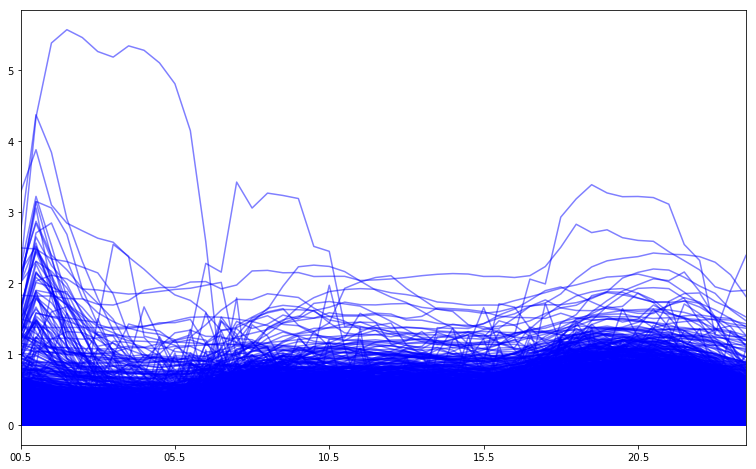

In [15]:
avg_house_data.T.plot(figsize=(13,8), legend=False, color='blue',alpha=0.5)

In [17]:
#avg_house_data1 = sqlcontext.createDataFrame(avg_house_data) 
#avg_house_data1.write.format("csv").save(base_path+"avg.csv")

In [ ]:
avg_house_data.to_csv(base_path+"avg.csv", header=True)